# 1. 라이브러리 / 데이터 불러오기

## 1-1. 라이브러리 불러오기

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import seaborn as sns
from IPython.display import Image
import pydotplus
import pandas as pd
import numpy as np
import os

필요한 라이브러리를 임포트한다.

에러가 날 경우

!pip install 패키지명

을 입력하여 설치하도록 한다.


### *패키지 설치 오류시에는 아래의 명령을 별도로 실행하여 패키지를 설치하세요

!pip install matplotlib  
!pip install scikit-learn  
!pip install graphviz  
!pip install seaborn  
!pip install IPython  
!pip install pydotplus  
!pip install pandas  
!pip install numpy

##  1-2. 데이터셋 불러오기


In [2]:
path = "F:/impix/data/"
os.chdir(path)

df = pd.read_csv("pasteurizer.csv")

pd.read_csv(“데이터파일_경로명”)을 통해 csv 형태의 데이터를 판다스(pandas)의 DataFrame으로 읽어 들인다.  
이 예제에서는 csv 형태이기 때문에 read_csv()를 사용하였지만, excel, csv, hdf5 형식인 데이터도 불러올 수 있다.  
이런 형식일 경우에는 read_excel(), read_csv(), read_hdf()를 사용하면 된다.


## 1-3. 데이터 확인

In [3]:
df

,STD_DT,MIXA_PASTEUR_STATE,MIXB_PASTEUR_STATE,MIXA_PASTEUR_TEMP,MIXB_PASTEUR_TEMP,INSP
0,2020-03-04 6:00,1.0,1.0,551.0,524.0,OK
1,2020-03-04 6:30,1.0,1.0,584.0,536.0,OK
2,2020-03-04 7:00,1.0,1.0,584.0,536.0,OK
3,2020-03-04 7:30,1.0,1.0,585.0,536.0,OK
4,2020-03-04 8:00,1.0,1.0,585.0,536.0,OK
...,...,...,...,...,...,...
210789,2020-11-11 18:34,NaN,NaN,586.0,566.0,OK
210790,2020-11-11 18:35,NaN,NaN,582.0,569.0,OK
210791,2020-11-11 18:36,NaN,NaN,577.0,572.0,OK
210792,2020-11-11 18:37,NaN,NaN,572.0,575.0,OK


불러온 데이터프레임의 변수 df를 입력하면 해당 내용을 확인해 볼 수 있다.  
데이터는 총 6개의 컬럼으로 구성되어져 있고, 총 210,794개의 행으로 구성된 것을 확인할 수 있다.

In [4]:
df.head(20)

,STD_DT,MIXA_PASTEUR_STATE,MIXB_PASTEUR_STATE,MIXA_PASTEUR_TEMP,MIXB_PASTEUR_TEMP,INSP
0,2020-03-04 6:00,1.0,1.0,551.0,524.0,OK
1,2020-03-04 6:30,1.0,1.0,584.0,536.0,OK
2,2020-03-04 7:00,1.0,1.0,584.0,536.0,OK
3,2020-03-04 7:30,1.0,1.0,585.0,536.0,OK
4,2020-03-04 8:00,1.0,1.0,585.0,536.0,OK
5,2020-03-04 8:30,1.0,1.0,585.0,536.0,OK
6,2020-03-04 9:00,1.0,1.0,585.0,537.0,OK
7,2020-03-04 9:30,1.0,1.0,585.0,538.0,OK
8,2020-03-04 10:00,1.0,1.0,585.0,541.0,OK
9,2020-03-04 10:30,1.0,1.0,585.0,543.0,OK


In [5]:
df.tail()

,STD_DT,MIXA_PASTEUR_STATE,MIXB_PASTEUR_STATE,MIXA_PASTEUR_TEMP,MIXB_PASTEUR_TEMP,INSP
210789,2020-11-11 18:34,NaN,NaN,586.0,566.0,OK
210790,2020-11-11 18:35,NaN,NaN,582.0,569.0,OK
210791,2020-11-11 18:36,NaN,NaN,577.0,572.0,OK
210792,2020-11-11 18:37,NaN,NaN,572.0,575.0,OK
210793,2020-11-11 18:38,NaN,NaN,568.0,576.0,OK


# 2. 데이터 종류 및 개수 확인

## 2-1. 컬럼명 확인

In [6]:
df.columns

Index(['STD_DT', 'MIXA_PASTEUR_STATE', 'MIXB_PASTEUR_STATE',
       'MIXA_PASTEUR_TEMP', 'MIXB_PASTEUR_TEMP', 'INSP'],
      dtype='object')

데이터프레임에 들어있는 컬럼명을 확인하는 코드로  
['STD_DT', 'MIXA_PASTEUR_STATE', 'MIXB_PASTEUR_STATE','MIXA_PASTEUR_TEMP', 'MIXB_PASTEUR_TEMP', 'INSP']  
총 6개의 컬럼을 확인할 수 있다.

## 2-2. 데이터 정보 확인하기
 - 불러들인 데이터를 구성하고 있는 요소들의 컬럼명, 데이터 타입, 컬럼별 null이 아닌 데이터 개수 등을 확인

## 2-3. 요약 통계량 확인

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210794 entries, 0 to 210793
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   STD_DT              210794 non-null  object 
 1   MIXA_PASTEUR_STATE  11135 non-null   float64
 2   MIXB_PASTEUR_STATE  10255 non-null   float64
 3   MIXA_PASTEUR_TEMP   201423 non-null  float64
 4   MIXB_PASTEUR_TEMP   198802 non-null  float64
 5   INSP                210794 non-null  object 
dtypes: float64(4), object(2)
memory usage: 9.6+ MB


불러들인 데이터를 구성하고 있는 요소들의 컬럼명, 컬럼별  null이 아닌 데이터 개수, 데이터 타입을 확인할 수 있다.  
이 데이터는 float64 형이 4개, object형이 2개라고 나온다.

In [8]:
df.describe()

,MIXA_PASTEUR_STATE,MIXB_PASTEUR_STATE,MIXA_PASTEUR_TEMP,MIXB_PASTEUR_TEMP
count,1.113500e+04,10255.000000,201423.000000,1.988020e+05
mean,5.032693e+04,633.200390,566.867528,1.862568e+04
std,5.286901e+05,6408.270847,69.061703,8.111731e+05
min,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,0.000000e+00,0.000000,543.000000,5.420000e+02
50%,1.000000e+00,1.000000,570.000000,5.690000e+02
75%,1.000000e+00,1.000000,596.000000,5.950000e+02
max,5.603841e+06,65536.000000,772.000000,4.279501e+07


describe() 명령을 통해 다양한 요약 통계를 확인할 수 있다. 각 항목에 대한 설명은 다음과 같다.  
 - count : null이 아닌 행의 개수  
 - mean : 평균
 - std : 표준 편차
 - min : 최소값
 - 25% : 1/4 분위
 - 50% : 중앙값
 - 75% : 3/4 분위
 - max :최대값

## 2-4. 데이터 개수 확인

In [9]:
df.shape

(210794, 6)

데이터프레임의 크기는 shape 명령을 통해 (행,열) 의 개수를 확인할 수 있다.  
이 데이터는 행이 210,794개이고 열이 6개인 데이터임을 보여준다.

## 2-5. 특정 컬럼 개수 확인

In [10]:
df['INSP'].value_counts()

OK    133010
NG     77784
Name: INSP, dtype: int64

## 2-6. 컬럼별 null 개수 확인

In [11]:
df.isna().sum()

STD_DT                     0
MIXA_PASTEUR_STATE    199659
MIXB_PASTEUR_STATE    200539
MIXA_PASTEUR_TEMP       9371
MIXB_PASTEUR_TEMP      11992
INSP                       0
dtype: int64

# 3. 데이터 전처리

## 3-1. 결측치 제거


In [12]:
df = df.dropna()

dropna()를 통해 null 값이 있는 행은 삭제한다.

## 3-2. 결측치 제거 결과 확인

In [13]:
df.isna().sum()

STD_DT                0
MIXA_PASTEUR_STATE    0
MIXB_PASTEUR_STATE    0
MIXA_PASTEUR_TEMP     0
MIXB_PASTEUR_TEMP     0
INSP                  0
dtype: int64

삭제가 제대로 이루어졌는지 확인하기 위해 다시 컬럼별 null 개수를 확인해보니 모두 0으로 나타나는 것을 확인할 수 있다.

(array([9383.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         100.]),
 array([      0. ,  560384.1, 1120768.2, 1681152.3, 2241536.4, 2801920.5,
        3362304.6, 3922688.7, 4483072.8, 5043456.9, 5603841. ]),
 <BarContainer object of 10 artists>)

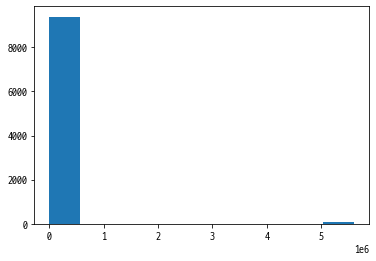

In [14]:
plt.hist(df['MIXA_PASTEUR_STATE'])

데이터의 분포, 중심 경향, 치우침 정도들을 파악하기 위해 주로 사용하는 히스토그램을 통해 특정 컬럼의 데이터를 살펴볼 수 있다.  
이 컬럼의 값은 9383개의 행이 0과 560384 사이에 분포하고, 나머지 100개가 5043456과 5603841 사이에 분포하고 있는 것으로 나타난다.

In [15]:
df['MIXA_PASTEUR_STATE'].unique()

array([1.000000e+00, 5.603841e+06, 0.000000e+00])

unique()를 통해 특정 컬럼의 유일값을 파악할 수 있다. MIXA_PASTEUR_STATE 컬럼에는 총 3개의 유일한 값이 존재하며, 그 값은 0, 1 그리고 5603841 로 나타난다.  
이 컬럼은 상태값을 나타내는데 0과 1이 아닌 다른 값들은 잘못된 값이기 때문에 분석에서 제거할 필요가 있다.

In [16]:
df = df[df.MIXA_PASTEUR_STATE < 2]

MIXA_PASTEUR_STATE의 값이 2 이상인 행 제거

In [17]:
df

,STD_DT,MIXA_PASTEUR_STATE,MIXB_PASTEUR_STATE,MIXA_PASTEUR_TEMP,MIXB_PASTEUR_TEMP,INSP
0,2020-03-04 6:00,1.0,1.0,551.0,524.0,OK
1,2020-03-04 6:30,1.0,1.0,584.0,536.0,OK
2,2020-03-04 7:00,1.0,1.0,584.0,536.0,OK
3,2020-03-04 7:30,1.0,1.0,585.0,536.0,OK
4,2020-03-04 8:00,1.0,1.0,585.0,536.0,OK
...,...,...,...,...,...,...
160703,2020-09-15 15:00,1.0,1.0,560.0,580.0,OK
160734,2020-09-15 15:30,1.0,1.0,588.0,555.0,OK
160765,2020-09-15 16:00,1.0,1.0,588.0,550.0,OK
160796,2020-09-15 16:30,1.0,1.0,595.0,555.0,OK


(array([4729.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4654.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

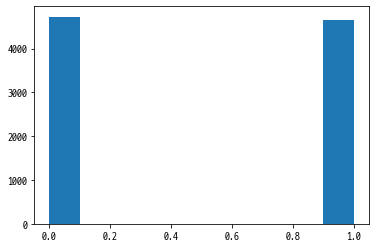

In [18]:
plt.hist(df['MIXA_PASTEUR_STATE'])

(array([4729.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4654.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

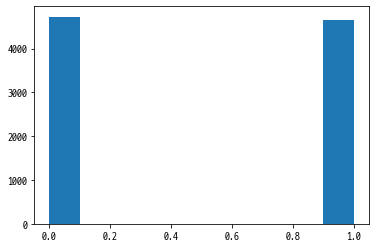

In [19]:
plt.hist(df['MIXB_PASTEUR_STATE'])

(array([   7.,    0.,    0., 2720.,  158.,  241., 1688., 4304.,  238.,
          27.]),
 array([  0. ,  77.2, 154.4, 231.6, 308.8, 386. , 463.2, 540.4, 617.6,
        694.8, 772. ]),
 <BarContainer object of 10 artists>)

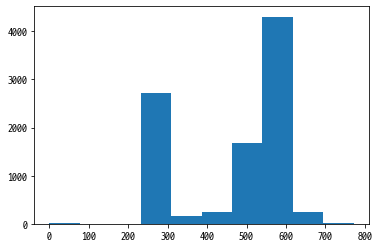

In [20]:
plt.hist(df['MIXA_PASTEUR_TEMP'])

(array([   7.,    0.,    0., 1749., 1423.,   10., 1487., 4418.,  250.,
          39.]),
 array([  0. ,  76.5, 153. , 229.5, 306. , 382.5, 459. , 535.5, 612. ,
        688.5, 765. ]),
 <BarContainer object of 10 artists>)

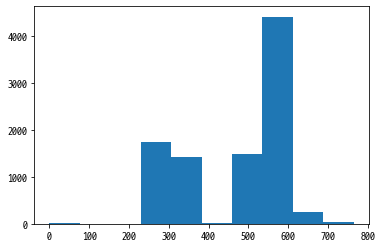

In [21]:
plt.hist(df['MIXB_PASTEUR_TEMP'])

# 4. 데이터 특성 파악

## 4-1. 요약 통계

array([[<AxesSubplot:title={'center':'MIXA_PASTEUR_STATE'}>,
        <AxesSubplot:title={'center':'MIXB_PASTEUR_STATE'}>],
       [<AxesSubplot:title={'center':'MIXA_PASTEUR_TEMP'}>,
        <AxesSubplot:title={'center':'MIXB_PASTEUR_TEMP'}>]], dtype=object)

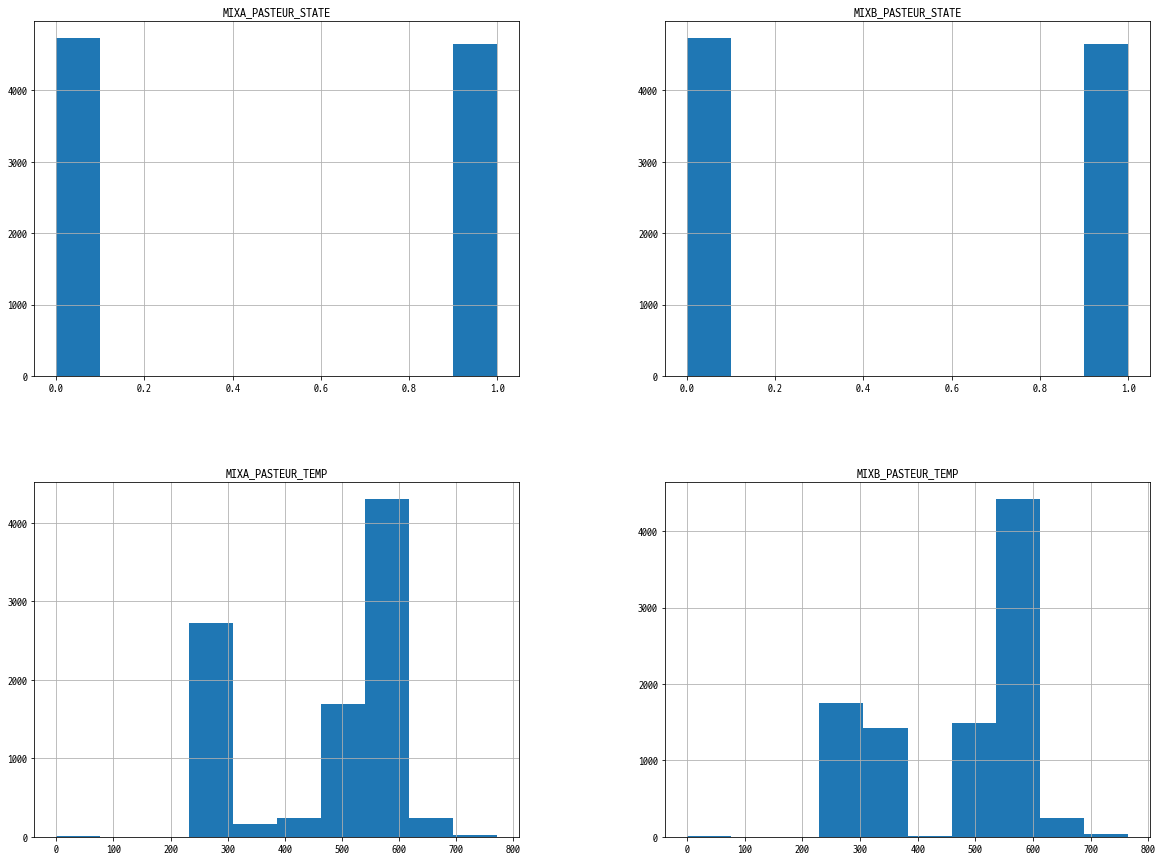

In [22]:
df.hist(bins=10, figsize=(20, 15))

## 4-2. 특성간의 상관 관계

In [23]:
df.corr()

,MIXA_PASTEUR_STATE,MIXB_PASTEUR_STATE,MIXA_PASTEUR_TEMP,MIXB_PASTEUR_TEMP
MIXA_PASTEUR_STATE,1.000000,1.000000,0.523328,0.465706
MIXB_PASTEUR_STATE,1.000000,1.000000,0.523328,0.465706
MIXA_PASTEUR_TEMP,0.523328,0.523328,1.000000,0.920102
MIXB_PASTEUR_TEMP,0.465706,0.465706,0.920102,1.000000


## 4-3. 히트맵


<AxesSubplot:>

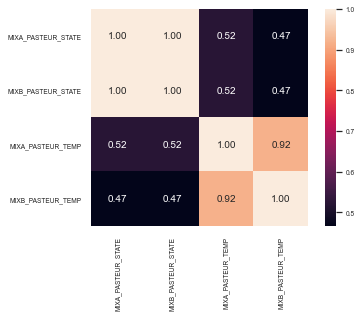

In [24]:
names = ['MIXA_PASTEUR_STATE','MIXB_PASTEUR_STATE','MIXA_PASTEUR_TEMP','MIXB_PASTEUR_TEMP']
cm = np.corrcoef(df[names].values.T)
sns.set(font_scale=0.6)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
            yticklabels=names,xticklabels=names)

히트맵을 통해서 특성간의 상관 관계를 나타낼 수 있다.

## 4-4. 산점도 매트릭스

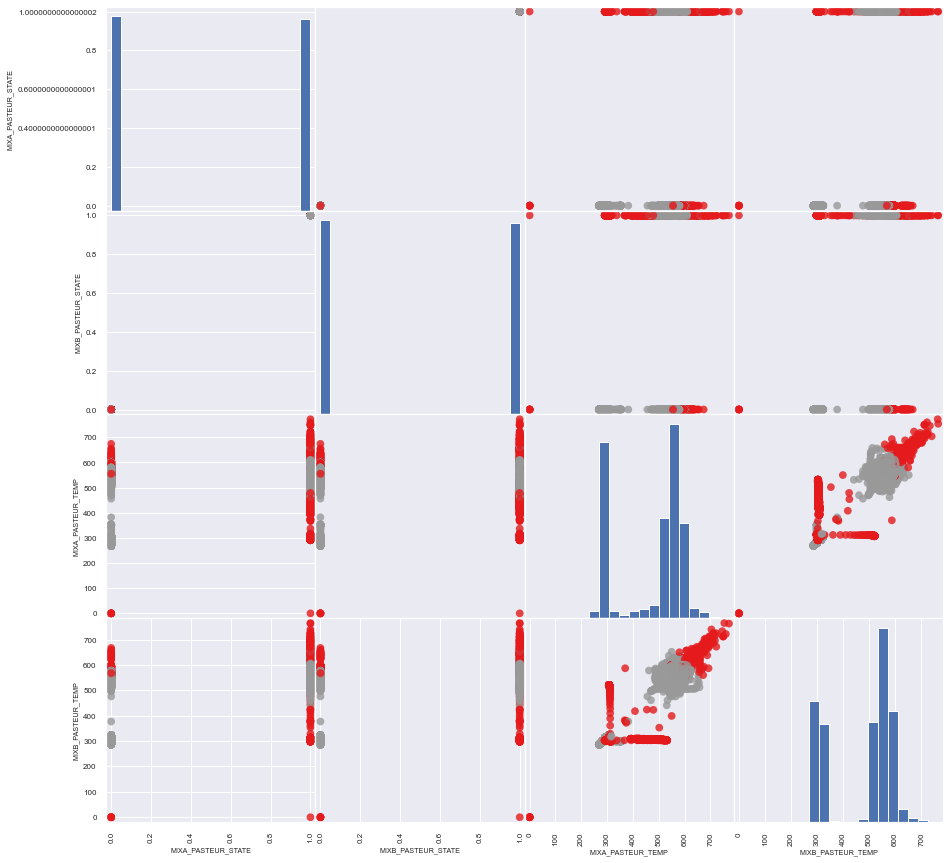

In [25]:
y = df.iloc[:, -1:].values
y = np.where(y == 'OK', 1, 0)
y = y.ravel()
pd.plotting.scatter_matrix(df, c=y, figsize=(15, 15), marker='o', 
                           hist_kwds={'bins':20},s=60,alpha=.8, cmap=plt.cm.Set1)
plt.show()

# 5. 데이터 분리

In [26]:
 # 측정데이터와 레이블(정답)을 분리
X = df.iloc[:, 1:5].values
y = df.iloc[: , -1:].values
# print(y[-1:].reshape(-1))   # iloc으로 받아오면 numpy의 ndarray형이다.
y = np.where(y == 'OK', 1, 0)
y = y.ravel()   # 레이블을 1차원으로 변경하자.
print(X.shape, y.shape)


(9383, 4) (9383,)


In [27]:
# 훈련셋과 테스트셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [28]:
X_train

array([[  0.,   0., 526., 584.],
       [  0.,   0., 571., 526.],
       [  0.,   0., 294., 314.],
       ...,
       [  1.,   1., 543., 578.],
       [  1.,   1., 594., 583.],
       [  1.,   1., 582., 542.]])

# 6. 모델 훈련


In [29]:
dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf = dt_clf.fit(X_train, y_train)
dt_prediction = dt_clf.predict(X_test)

# 7. 의사결정나무 시각화

In [30]:
feature_names = df.columns.tolist()
feature_names = feature_names[1:5]
target_name = np.array(['0', '1'])

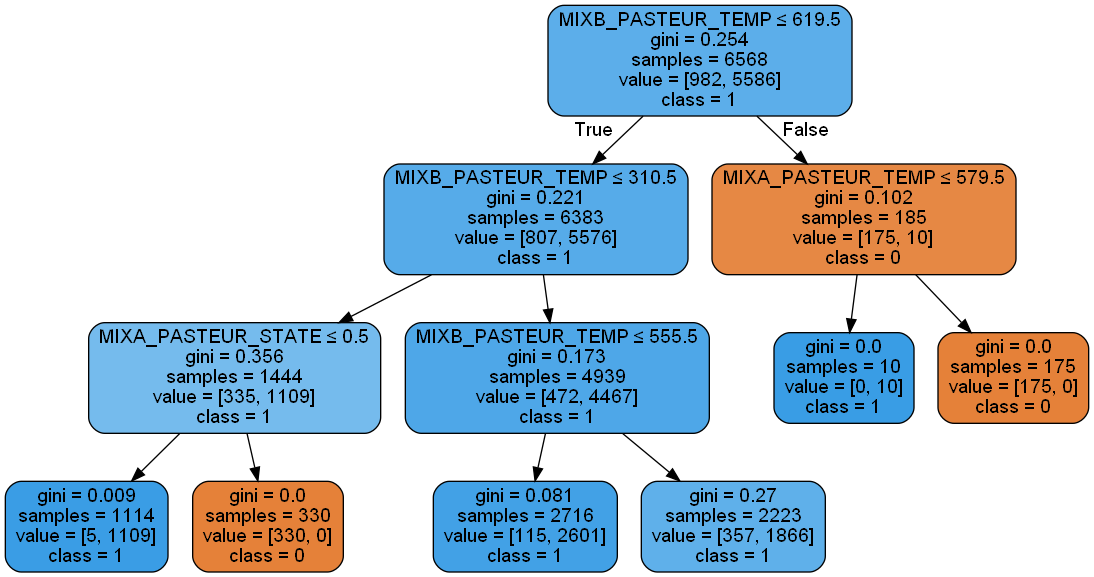

In [31]:
dt_dot_data = tree.export_graphviz(dt_clf, feature_names=feature_names, class_names=target_name, 
                                filled=True, rounded = True, special_characters = True)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
Image(dt_graph.create_png())

graphviz와 관련된 에러가 발생할 경우 환경설정에 대한 문제일 가능성이 매우 높으므로 (부록으로 제공된 Graphviz 설치방법을 참조하여 진행한 경우에 한하여) 아래의 코드를 실행하고 위의 코드를 재실행하면 해결될 가능성이 높습니다. 만약 동일한 에러가 발생하는 경우 부록을 참조하세요.

In [33]:
# 위의 코드에서 에러가 발생하지 않은 경우에는 이 라인을 실행할 필요가 없습니다.
import os
os.environ['PATH'] += os.pathsep + "C:/Program Files/Graphviz 2.44.1/bin/"

# 8. 결과 분석 및 해석

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

In [33]:
def get_clf_eval(y_test=None, pred=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도 :{0: .4f}, 정밀도: {1: .4f}, 재현율: {2: .4f}, F1 : {3: .4f}, \
    AUC: {4: .4f}'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test, dt_prediction)

오차 행렬
[[ 237  196]
 [   1 2381]]
정확도 : 0.9300, 정밀도:  0.9239, 재현율:  0.9996, F1 :  0.9603,     AUC:  0.7735
